In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_columns', 50)
sns.set(style='whitegrid', palette='muted')

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
data_path = 'kaggle_survey_2017_2021.csv'
df = pd.read_csv(data_path, low_memory=False)
print('Shape:', df.shape)
df.head() 

Shape: (106302, 293)


,-,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,...,Q34_B_OTHER,Q36_B_Part_1,Q36_B_Part_2,Q36_B_Part_3,Q36_B_Part_4,Q36_B_Part_5,Q36_B_Part_6,Q36_B_Part_7,Q36_B_OTHER,Q37_B_Part_1,Q37_B_Part_2,Q37_B_Part_3,Q37_B_Part_4,Q37_B_Part_7,Q37_B_OTHER,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_9,Q38_B_Part_11,Q38_B_OTHER
0,Year,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming language would you recommend ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,...,Which of the following business intelligence t...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,2021,910,50-54,Man,India,Bachelorâ€™s degree,Other,5-10 years,Python,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,784,50-54,Man,Indonesia,Masterâ€™s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,C,C++,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,NaN,...,NaN,NaN,NaN,"Automated model selection (e.g. auto-sklearn, ...",NaN,NaN,NaN,NaN,NaN,Google Cloud AutoML,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,924,22-24,Man,Pakistan,Masterâ€™s degree,Software Engineer,1-3 years,Python,NaN,NaN,NaN,C++,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,NaN,...,NaN,NaN,NaN,"Automated model selection (e.g. auto-sklearn, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DataRobot AutoML,NaN,NaN,NaN,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN
4,2021,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,NaN,...,NaN,

In [5]:
df.info()
df.describe(include='all').T.head(10)

missing_values = df.isna().mean().sort_values(ascending=False)
missing_values[missing_values > 0].head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106302 entries, 0 to 106301
Columns: 293 entries, - to Q38_B_OTHER
dtypes: object(293)
memory usage: 237.6+ MB


Q38_B_Part_11    0.999991
Q32_B_Part_20    0.999991
Q27_B_Part_11    0.999991
Q14_Part_11      0.999991
Q10_Part_16      0.999991
Q40_Part_11      0.999991
Q37_B_Part_7     0.999991
Q9_Part_12       0.999991
Q32_A_Part_20    0.999991
Q16_Part_17      0.999991
Q17_Part_11      0.999991
Q34_A_Part_16    0.999991
Q19_Part_5       0.999991
Q18_Part_6       0.999991
Q36_B_Part_7     0.999991
dtype: float64

In [6]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.columns[:10]

Index(['-', 'time_from_start_to_finish_(seconds)', 'q1', 'q2', 'q3', 'q4',
       'q5', 'q6', 'q7_part_1', 'q7_part_2'],
      dtype='object')

In [7]:
before = len(df)
df = df.drop_duplicates()
after = len(df)
print(f'Dropped {before - after} duplicate rows') 

key_cols = [col for col in ['Country', 'Gender', 'Occupation'] if col in df.columns]
df = df.dropna(subset=key_cols)

for c in df.select_dtypes(include= np.number):
    df[c] = df[c].fillna(df[c].median())

for c in df.select_dtypes(include= 'object'):
    df[c] = df[c].fillna('Unknown') 

Dropped 4456 duplicate rows


In [8]:
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x) 

possible_genders_cols = [c for c in df.columns if 'gender' in c.lower() or c.strip().startswith('Q2')]
print('Detected gender columns', possible_genders_cols) 

if possible_genders_cols:
    df = df.rename(columns={possible_genders_cols[0]: 'gender'})
else:
    print('No gender column detected') 

C:\Users\joann\AppData\Local\Temp\ipykernel_12244\3805522972.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


Detected gender columns []
No gender column detected


In [9]:
for i, col in enumerate(df.columns[:20]):
    print(f'{i}: {col}')

0: -
1: time_from_start_to_finish_(seconds)
2: q1
3: q2
4: q3
5: q4
6: q5
7: q6
8: q7_part_1
9: q7_part_2
10: q7_part_3
11: q7_part_4
12: q7_part_5
13: q7_part_6
14: q7_part_7
15: q7_part_8
16: q7_part_9
17: q7_part_10
18: q7_part_11
19: q7_part_12


In [10]:
df['q2'].head(10) 

0    What is your gender? - Selected Choice
1                                       Man
2                                       Man
3                                       Man
4                                       Man
5                                       Man
6                                     Woman
7                                     Woman
8                                       Man
9                                       Man
Name: q2, dtype: object

In [11]:
df = df.rename(columns={'q1': 'age', 'q3': 'country', 'q4': 'education', 'q5': 'occupation'})   
 
df = df.rename(columns={'q2': 'gender'})
df['gender_norm'] = df['gender'].astype(str).str.lower().map({
        'male': 'Male', 'm': 'Male', 'man': 'Male',
        'female': 'Female', 'f': 'Female', 'woman': 'Female',
        'non-binary': 'Non-binary', 'nb': 'Non-binary'
    }).fillna(df['gender']) 

df[['gender', 'gender_norm']].head(10) 

,gender,gender_norm
0,What is your gender? - Selected Choice,What is your gender? - Selected Choice
1,Man,Male
2,Man,Male
3,Man,Male
4,Man,Male
5,Man,Male
6,Woman,Female
7,Woman,Female
8,Man,Male
9,Man,Male


In [12]:
encode_cols = [c for c in ['country', 'gender_norm', 'occupation'] if c in df.columns] 
encoders = {}

for col in encode_cols:
    le = LabelEncoder()
    df[col + '_le'] = le.fit_transform(df[col].astype(str))
    encoders[col] = le

df.head(31) 

,-,time_from_start_to_finish_(seconds),age,gender,country,education,occupation,q6,q7_part_1,q7_part_2,q7_part_3,q7_part_4,q7_part_5,q7_part_6,q7_part_7,q7_part_8,q7_part_9,q7_part_10,q7_part_11,q7_part_12,q7_other,q8,q9_part_1,q9_part_2,q9_part_3,...,q36_b_part_4,q36_b_part_5,q36_b_part_6,q36_b_part_7,q36_b_other,q37_b_part_1,q37_b_part_2,q37_b_part_3,q37_b_part_4,q37_b_part_7,q37_b_other,q38_b_part_1,q38_b_part_2,q38_b_part_3,q38_b_part_4,q38_b_part_5,q38_b_part_6,q38_b_part_7,q38_b_part_9,q38_b_part_11,q38_b_other,gender_norm,country_le,gender_norm_le,occupation_le
0,Year,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming language would you recommend ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...",What is your gender? - Selected Choice,26,8,31
1,2021,910,50-54,Man,India,Bachelorâ€™s degree,Other,5-10 years,Python,R,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Python,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Male,27,2,19
2,2021,784,50-54,Man,Indonesia,Masterâ€™s degree,Program/Project Manager,20+ years,Unknown,Unknown,SQL,C,C++,Java,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Python,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Google Cloud AutoML,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Male,28,2,24
3,2021,924,22-24,Man,Pakistan,Masterâ€™s degree,Software Engineer,1-3 years,Python,Unknown,Unknown,Unknown,C++,Java,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Python,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,DataRobot AutoML,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,TensorBoard,Unknown,Unknown,Unknown,Unknown,Unknown,Male

In [13]:
insights = []

if 'country' in df.columns:
    top_countries = df['country'].value_counts().head(10)
    insights.append(('Top 10 countries by number of respondents:', top_countries.to_dict())) 

if 'gender_norm' in df.columns:
    gender_dist = df['gender_norm'].value_counts(normalize=True).mul(100).round(1)
    insights.append(('Gender distribution (%):', gender_dist.to_dict())) 

for col in ['language_worked_with', 'language_programming_worked_with', 'primary_programming_language']:
    if col in df.columns:
        langs = (df[col].dropna().astype(str).str.split(r'[;,]').explode().str.strip().value_counts().head(10))
        insights.append((f"Top 10 languages from '{col}'", langs.to_dict())) 
    break

for col in ['occupation', 'job_title', 'job_role']:
    if col in df.columns:
        top_roles = df[col].value_counts().head(10)
        insights.append(('Top job roles ', top_roles.to_dict())) 
    break

for col in ['years_of_experience', 'years_programming']:
    if col in df.columns:
        insights.append(('Experience Summary:', df[col].describe().to_dict())) 
    break

if not insights:
    print("No insights could be generated from the dataset.")
else:
    for i, (title, details) in enumerate(insights, start=1):
        print('\nInsight {i}: {title}')

if isinstance(details, dict):
        for k, v in list(details.items())[:20]:
            print(f'  {k}: {v}')
else:
    print(details) 


Insight {i}: {title}

Insight {i}: {title}

Insight {i}: {title}
  Student: 21237
  Data Scientist: 16167
  Software Engineer: 10252
  Data Analyst: 8267
  Other: 8224
  Research Scientist: 5371
  Unknown: 4915
  Business Analyst: 4013
  Currently not employed: 3638
  Machine Learning Engineer: 3104


C:\Users\joann\AppData\Local\Temp\ipykernel_12244\2898029578.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




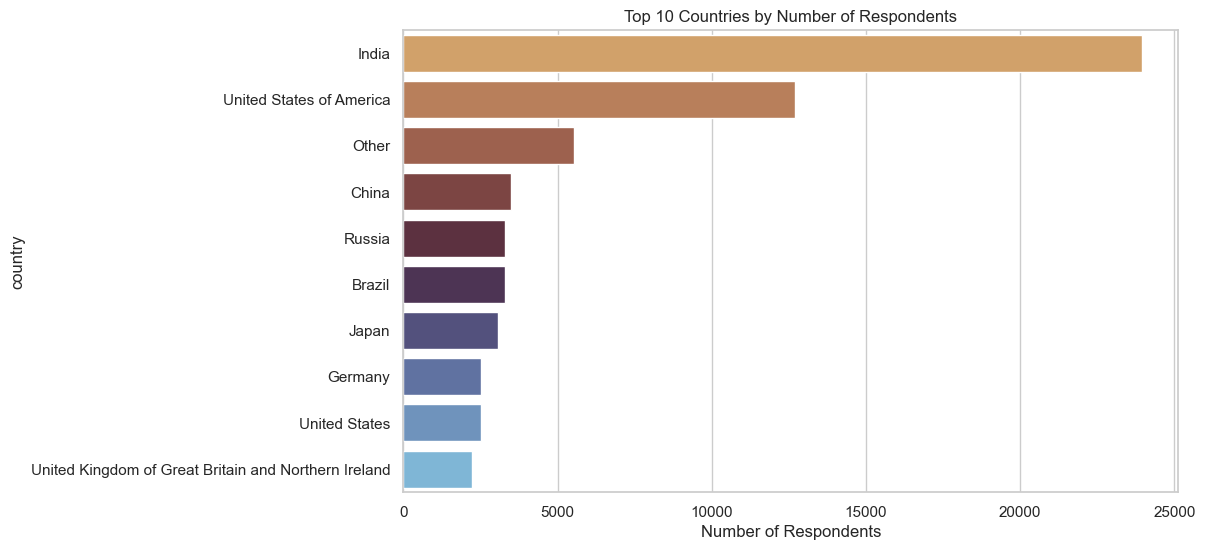

C:\Users\joann\AppData\Local\Temp\ipykernel_12244\2898029578.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




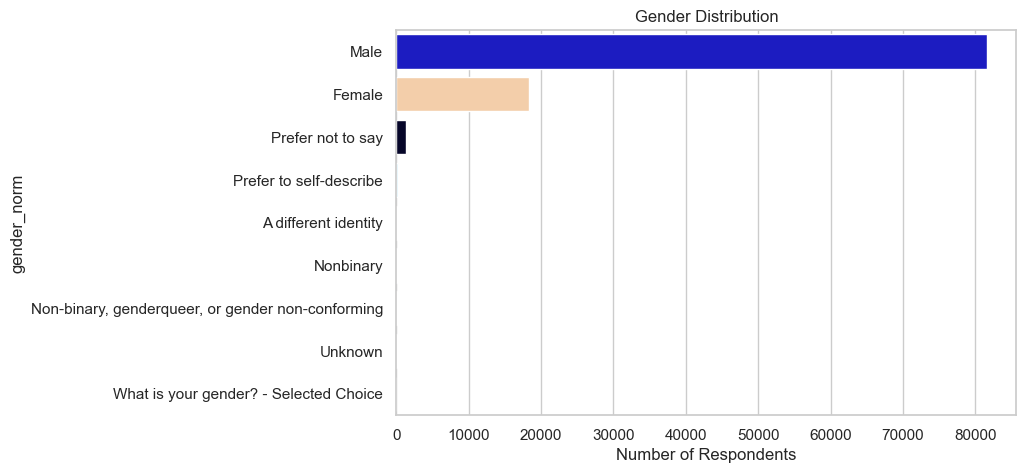

In [17]:
if'country' in df.columns:
    top = df['country'].value_counts().head(10)
    plt.figure(figsize=(10, 6))
    sns.barplot(y=top.index, order=top.index, x=top.values, palette='managua')
    plt.title('Top 10 Countries by Number of Respondents')
    plt.xlabel('Number of Respondents')
    plt.show()

if 'gender_norm' in df.columns:
    top = df['gender_norm'].value_counts()
    plt.figure(figsize=(8, 5))
    sns.barplot(y=top.index, order=top.index, x=top.values, palette='flag')
    plt.title('Gender Distribution')
    plt.xlabel('Number of Respondents')
    plt.show()

In [19]:
if'country' in df.columns:
    country_counts = df['country'].value_counts().head(15).reset_index()
    country_counts.columns = ['Country', 'Respondents']
    fig = px.bar(country_counts, x='Respondents', y='Country', orientation='h',
                 title='Top 15 Countries by Number of Respondents', text='Respondents', color_continuous_scale='Managua')
    fig.show()

if 'gender_norm' in df.columns:
    fig = px.pie(df, names='gender_norm', title='Gender Breakdown', color_discrete_sequence=px.colors.sequential.RdBu)
    fig.show()

In [16]:
#output_file = 'data_science_survey_insights.csv'
#df.to_csv(output_file, index=False)
#print(f'Cleaned data with insights saved to {output_file}') 